Importing required libraries and neccessary modules

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import shap

# Import necessary modules
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV

Read in the train and test datasets

In [8]:
X_train_1 = pd.read_csv("../data/X_train_part1.csv", index_col = "index")
X_train_2 = pd.read_csv("../data/X_train_part2.csv", index_col = "index")
X_train_3 = pd.read_csv("../data/X_train_part3.csv", index_col = "index")

X_train = pd.concat([X_train_1,X_train_2,X_train_3])
y_train = pd.read_csv("../data/y_train.csv", index_col = "index")

X_test = pd.read_csv("../data/X_test.csv", index_col = "index")
y_test = pd.read_csv("../data/y_test.csv", index_col = "index")

We shall do a quick inspection of the train and test datasets again before moving on to build the model

In [9]:
X_train, X_test

(             month  flat_type  floor_area_sqm  remaining_lease  lower_storey  \
 index                                                                          
 21935   1991-10-01          3            73.0             91.2             4   
 82906   1994-12-01          5           131.0             87.0            10   
 833379  2021-01-01          4            92.0             90.8             4   
 49991   1993-09-01          3            65.0             86.2             1   
 379757  2002-07-01          3            67.0             80.4             7   
 ...            ...        ...             ...              ...           ...   
 749929  2017-04-01          4            90.0             82.5            10   
 626092  2010-11-01          5           117.0             63.1             1   
 646024  2011-09-01          4            84.0             75.2             1   
 344843  2001-08-01          4           107.0             93.3             4   
 927211  2024-06-01         

In [5]:
print("X_train datatypes:")
print(X_train.dtypes)
print()
print("y_train datatypes:")
print(y_train.dtypes)
print(f"No of dimensions: {y_train.ndim}")
print()
print("X_test datatypes:")
print(X_test.dtypes)
print()
print("y_test datatypes:")
print(y_test.dtypes)
print(f"No of dimensions: {y_test.ndim}")

X_train datatypes:
month                  object
flat_type               int64
floor_area_sqm        float64
remaining_lease       float64
lower_storey            int64
upper_storey            int64
flat_model_encoded    float64
town_encoded          float64
dtype: object

y_train datatypes:
resale_price    float64
dtype: object
No of dimensions: 2

X_test datatypes:
month                  object
flat_type               int64
floor_area_sqm        float64
remaining_lease       float64
lower_storey            int64
upper_storey            int64
flat_model_encoded    float64
town_encoded          float64
dtype: object

y_test datatypes:
resale_price    float64
dtype: object
No of dimensions: 2


We notice that in our X_train and X_test, the month is of object type. For our neural network model MLPRegressor, we requires all input features to be numerical.

To convert the month column to numerical, we decide to first convert it to datetime type, and thereafter extract the year and month as separate features.

In [10]:
# Convert 'month' column to datetime type
X_train['month'] = pd.to_datetime(X_train['month'])
X_test['month'] = pd.to_datetime(X_test['month'])

# Extract year and month as separate features
X_train['year'] = X_train['month'].dt.year
X_train['month_num'] = X_train['month'].dt.month
X_test['year'] = X_test['month'].dt.year
X_test['month_num'] = X_test['month'].dt.month

# Remove the old month column and rearrange the columns
X_train = X_train.drop('month', axis=1)
X_test = X_test.drop('month', axis=1)
new_column_order = ['year', 'month_num', 'flat_type', 'floor_area_sqm', 'remaining_lease', 
'lower_storey', 'upper_storey', 'flat_model_encoded', 'town_encoded'] 
X_train = X_train[new_column_order]      
X_test = X_test[new_column_order]    

In [11]:
print("X_train datatypes:")
print(X_train.dtypes)
print()
print("X_test datatypes:")
print(X_test.dtypes)
print()

X_train datatypes:
year                    int32
month_num               int32
flat_type               int64
floor_area_sqm        float64
remaining_lease       float64
lower_storey            int64
upper_storey            int64
flat_model_encoded    float64
town_encoded          float64
dtype: object

X_test datatypes:
year                    int32
month_num               int32
flat_type               int64
floor_area_sqm        float64
remaining_lease       float64
lower_storey            int64
upper_storey            int64
flat_model_encoded    float64
town_encoded          float64
dtype: object



Also, MLPRegressor expects y_train and y_test to be a 1D array. So, we will reshape them by using the .flatten() function.

In [12]:
# Convert y_train and y_test to 1D arrays
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

# Check the dimension of y_train and y_test
print(f"y_train dim: {y_train.ndim}")
print(f"y_test dim: {y_test.ndim}")

y_train dim: 1
y_test dim: 1


# 1. Neural Network

## 1.1 Baseline model 

Instantiate and fitting baseline model

For our baseline model, we used the default parameter values set by sklearn. We set the random_state to be 42 to ensure reproducibility. To have an indication of how well the model is fitting, we also set verbose to be true for seeing the loss after each iteration. By default, MLPRegressor uses the mean squared error loss function. 

In [47]:
nn_base = MLPRegressor(
    random_state=42,
    verbose = True)

nn_base.fit(X_train, y_train)

Iteration 1, loss = 24213739498.30696869
Iteration 2, loss = 13578513855.18572617
Iteration 3, loss = 11948366287.12615967
Iteration 4, loss = 10035775878.45636749
Iteration 5, loss = 9070965325.67519760
Iteration 6, loss = 8764796899.71315765
Iteration 7, loss = 8576812178.53040791
Iteration 8, loss = 8425920740.04794502
Iteration 9, loss = 8306332264.21407700
Iteration 10, loss = 8211728191.21835709
Iteration 11, loss = 8138496642.25492096
Iteration 12, loss = 8079431272.53142166
Iteration 13, loss = 8031746319.46480465
Iteration 14, loss = 7991967172.89322758
Iteration 15, loss = 7957675184.23766136
Iteration 16, loss = 7926574662.02398300
Iteration 17, loss = 7897885294.86819935
Iteration 18, loss = 7871292623.88889408
Iteration 19, loss = 7846702480.85440445
Iteration 20, loss = 7823986247.24400902
Iteration 21, loss = 7801943504.97370148
Iteration 22, loss = 7781359594.55145645
Iteration 23, loss = 7762350572.23243809
Iteration 24, loss = 7744499133.64710903
Iteration 25, loss = 

C:\Users\lippi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=42, verbose=True)

## 1.2 Evaluation of baseline model

### 1.2.1 Evaluation Metrics

We first get the prediction of our model for both the training and test dataset. Then, we will be using them for the computation of our evaluation metrics. These metrics are on the macroscopic/dataset-wise level. Below are the 3 regression metrics we have used:

1) Root Mean-Squared Error (RMSE)
We chose RMSE as our first metric. This is because it heavily penalises larger prediction errors, which are critical in pricing contexts. Also, errors are measured in the same unit as the target, making it intuitive for interpretation.

2) Mean Absolute Percentage Error (MAPE)
Our second metric is MAPE. We chose this as it provides error as a percentage of actual prices, making it scale-independent and easy to compaare across flats with different price ranges. This is especially relevant in real estate, where pricing varies widely across different locations and housing types.

3) R-squared (R^2)
The last metric we use is R-squared. We choose it as it explains how well the model accounts for the variance in resale flat prices. This is also a common metric used for reporting overall model performance.

In [48]:
y_train_pred = nn_base.predict(X_train)
y_test_pred = nn_base.predict(X_test)

In [49]:
# Calculate the evaluation metrics
metrics = {
    'RMSE (Training)': root_mean_squared_error(y_train, y_train_pred),
    'RMSE (Test)': root_mean_squared_error(y_test, y_test_pred),
    'MAPE (Training)': mean_absolute_percentage_error(y_train, y_train_pred),
    'MAPE (Test)': mean_absolute_percentage_error(y_test, y_test_pred),
    'R^2 score (Training)': r2_score(y_train, y_train_pred),
    'R^2 score (Test)': r2_score(y_test, y_test_pred)
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Print the table
print(metrics_df)

# We also obtain the average prices for comparison
average_price_train = np.mean(y_train)
average_price_test = np.mean(y_test)

print()
print("Average Price (Training):", average_price_train)
print("Average Price (Test):", average_price_test)

                 Metric          Value
0       RMSE (Training)  117831.762013
1           RMSE (Test)  117823.177784
2       MAPE (Training)       0.395989
3           MAPE (Test)       0.397179
4  R^2 score (Training)       0.535430
5      R^2 score (Test)       0.537444

Average Price (Training): 323626.67095369
Average Price (Test): 323279.4499449993


From the above metrics, we can see that:
- The baseline model's training and test RMSE are similar, which indicates that the model generalises reasonably well. However, give that the average resale price for both training and test sets is around 323000, the RMSE for both is approximately 36-37% of this average price respectively. This shows that there is significant prediction error.
- The MAPE for both training and test sets is about 39.6%, which indicates that the model generalises well once again, but the model's predictions deviate substantially from the actual prices on average. This means the baseline model is not capturing the complex patterns in the data well.
- The R^2 score is about 0.53 for both training and test datasets, which is moderately low for our regression problem, so this means the model captures some meaningful patterns but leaves nearly half of the variance unexplained.

Thus, the default parameters of MLPRegressor are insufficient to capture the complex patterns in the dataset, which means it is underfitting. In the next section, we aim to improve this by increasing the model's complexity, perhaps through adding more hidden layers to make the model more complex.

## 1.3 Improvement

### 1.3.1 Increasing model complexity

We added another hidden layer to our improved model. Similar to before, we mostly use the default parameter values set by sklearn. We set the random_state to be 42 to ensure reproducibility. We used hidden_layer_sizes = (64, 32,) instead of the default value of (100,) to have a better balance between model complexity as well as runtime. 

In [14]:
nn = MLPRegressor(
    hidden_layer_sizes=(64, 32,),
    random_state=42,
    verbose = True)

nn.fit(X_train, y_train)

Iteration 1, loss = 17603728711.21408081
Iteration 2, loss = 9516263535.28273773
Iteration 3, loss = 8433320721.16966152
Iteration 4, loss = 8088275109.04591656
Iteration 5, loss = 7884772451.26768589
Iteration 6, loss = 7686451403.63798428
Iteration 7, loss = 7463774444.56692410
Iteration 8, loss = 7249446887.96774387
Iteration 9, loss = 7039639868.89047241
Iteration 10, loss = 6841557362.54864693
Iteration 11, loss = 6663059175.16921329
Iteration 12, loss = 6513528668.63579273
Iteration 13, loss = 6398326743.51808834
Iteration 14, loss = 6307084740.87487602
Iteration 15, loss = 6230349308.74212837
Iteration 16, loss = 6157484841.09705448
Iteration 17, loss = 6085758171.34999466
Iteration 18, loss = 6011194804.20978546
Iteration 19, loss = 5934141000.16947842
Iteration 20, loss = 5862755233.14619637
Iteration 21, loss = 5798532079.76108456
Iteration 22, loss = 5739179916.98727894
Iteration 23, loss = 5687510179.28905010
Iteration 24, loss = 5641387674.33032608
Iteration 25, loss = 559

C:\Users\lippi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), random_state=42, verbose=True)

## 1.3.2 Evaluation of improved model

### 1.3.2.1 Evaluation Metrics

In [50]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

In [51]:
# Calculate the evaluation metrics
metrics = {
    'RMSE (Training)': root_mean_squared_error(y_train, y_train_pred),
    'RMSE (Test)': root_mean_squared_error(y_test, y_test_pred),
    'MAPE (Training)': mean_absolute_percentage_error(y_train, y_train_pred),
    'MAPE (Test)': mean_absolute_percentage_error(y_test, y_test_pred),
    'R^2 score (Training)': r2_score(y_train, y_train_pred),
    'R^2 score (Test)': r2_score(y_test, y_test_pred)
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Print the table
print(metrics_df)

# We also obtain the average prices for comparison
average_price_train = np.mean(y_train)
average_price_test = np.mean(y_test)

print()
print("Average Price (Training):", average_price_train)
print("Average Price (Test):", average_price_test)

                 Metric         Value
0       RMSE (Training)  94102.595681
1           RMSE (Test)  94090.533649
2       MAPE (Training)      0.285689
3           MAPE (Test)      0.286344
4  R^2 score (Training)      0.703701
5      R^2 score (Test)      0.705018

Average Price (Training): 323626.67095369
Average Price (Test): 323279.4499449993


Analysis of metric values:

1. RMSE

In our case, the RMSE values are quite close for both the training and test sets, suggesting that the model is not overfitting and generalizes well to unseen data. However, while it generalises well, the absolute error (94,000) may be considered high for practical applications, depending on the acceptable margin of error for predicting resale flat prices.

2. MAPE

The MAPE values for both training and test datasets are really close (~28.6%). This means that the generalisation of the model is good, but the model's predictions are on average, 28.6% off from the actual price. Thus, the model is once again, shown to be consistent, but it needs refinement to reduce prediction errors to a more acceptable range (about 10-15%).

3. R^2 Score

An R² score of around 0.7 for both training and test datasets indicates that the model has no significant overfitting. However, it indicates that 30% of the variance in resale prices remains unexplained by the current model. This suggests that important features or relationships are lacking.

All in all, we see that the model did performed better than our baseline after increasing the complexity.

### 1.3.2.2 Predicted vs Actual, Residual Analysis

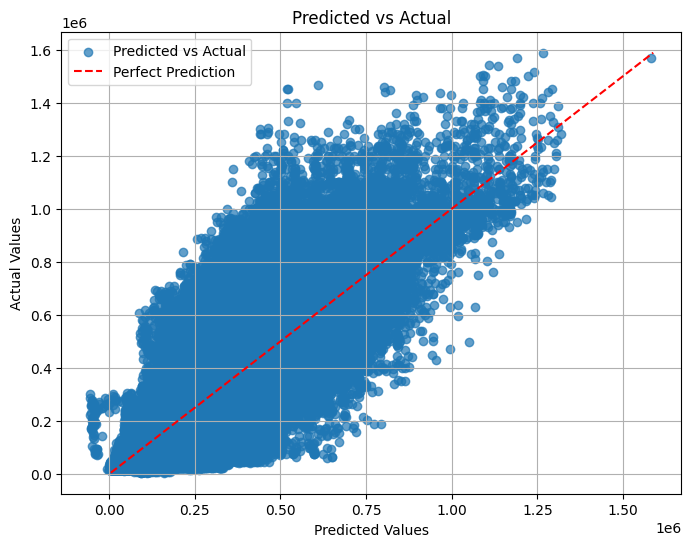

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, y_train, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.grid(True)
plt.legend()
plt.show()

Another way we can evaluate the model's performance is through a scatterplot of the predicted values against the actual values.

We observe that a significant number of points lie close to the red dashed line, especically for prices ranging from 200,000 to 1,000,000. This suggests that the model performs reasonably well for a majority of the predictions. However, for prices above 1,000,000, we see that there is more deviation from the perfect prediction line, which indicates that the model struggles with accurately predicting high-priced flats. For example, looking at the microscopic level, we can see that there is a data point where the model predicts the price to be about 1.26 million, but in actuality the price is about 1.6 million.

Some possible reasons for this struggle include there are fewer data points for high-priced flats in the training set, leading to underrepresentation. Also, there could be important features that are missing to better explain the variance for high-priced flats (eg. location from MRT, luxury features, etc.)

Additionally, the noticeable cluster of data points where actual values are high (800,000 to 1,000,000), but the predicted values are lower (below 600,000) suggests that the model is underestimating these prices.

For symmetry wise, the scatterplot appears relatively symmetrical. This implies there is no significant bias in either overpredicting or underpredicting. Though, there is still definitely bias in flat with high prices, especially those that costs above 1,200,000.

Overall, we can see that the model generalises well for most predictions once again by observing that there is relatively tight clustering around the red dashed line for most data points. The higher-priced flats show greater variance in predictions, so the model is struggling with rarer or more extreme cases. Some additional thoughts on what could be causing this problem in the model is that it could be due to our MLPRegressor having under-optimised hyperparameters and/or that predicting high-priced flats is an inherently difficult task if the variance in resale prices is high.

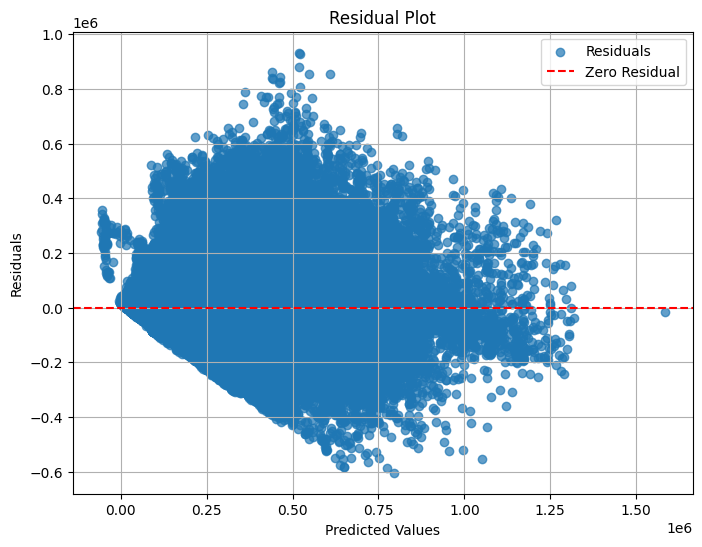

In [22]:
train_residuals = y_train - y_train_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, train_residuals, alpha=0.7, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()

From the residual plot, we observe that:

The residuals seem to form a funnel shape, narrowing at the lower predicted values and widening as predicted values increase. This suggests heteroscedasticity, which means that the variance of residuals is not constant across the range of predicted values. So, the model might struggle to handle higher variance in the target variable. 

Also, we see that there are much more points above the red line, which represents underprediction (actual value > predicted value). This indicates the model struggles with predicting higher-priced flats accurately. The overpredictions (i.e points below the red line) are fewer than that of the underpredictions, but nevertheless are still present, especially from mid- to high- range prices.

Causes for the above issues could stem from:
- Missing key features that explain high resale prices such as the location, amenities, etc.
- Non-linear relationships in the data that the model cannot fully capture
- Imbalanced training data (i.e fewer high-priced flats in the dataset)
- Limitations in model's ability to extrapolate for extreme values
- Potential outliers as we see that there are some points with extremely large residuals (> 0.6 mil or < 0.6 mil)

### 1.3.2.3 Feature Importance Analysis

We will be using SHapley Additive exPlanations (SHAP) for evaluating the most important features in contributing to our model's outputs. In essense, SHAP uses a game theoretic approach that measures each player's contribution to the final outcome. Taking this into the Machine Learning context, SHAP values show how much each feature contributes to moving a prediction away from the baseline. Advantages of using SHAP include having local interpretability (i.e SHAP values explain individual predictions) and global interpretability (i.e Aggregating SHAP values across all predictions helps identify the overall importance of features). It provides intuitive visualisations like summary plots to interpret results. However, one limitation is that for complex models, calculating SHAP values can be really computationally expensive, so we will have to simplify it to reduce costs as mentioned earlier about our limitations.

We first use the shap.kmeans() function to summarize the X_train dataset into 50 representative data points (i.e cluster centroids). These centroids are then used as the background data for the SHAP KernelExplainer. This is used as since KernelExplainer uses the background dataset to estimate SHAP values by sampling from this dataset, using the entire training dataset as the background would significantly slow down computational time. Thus, reduced the background to 50 clusters.

Also, to further speed up computational time, we took a subset of X_test. We limited the test dataset to the first 100 samples from X_test for SHAP value computation. 

Afterwards, we created a KernelExplainer object, which is used to estimate how the model's predictions change when features are perturbed. It uses the background dataset as a reference. It takes in 2 arguments, the first being our model's predict function and the background data for computing SHAP values.

Lastly, for computing SHAP values, we reduced the the number of Monte Carlo samples to 50 for speeding up computation at the cost of slightly less precision in the SHAP estimates. The Monte Carlo samples are used to approximate SHAP values for each test point. 

In [25]:
# Summarize background data
background = shap.kmeans(X_train, 50)  # Reduce to 50 clusters

# Use a smaller test dataset
X_test_subset = X_test[:100]

# Compute SHAP values with fewer Monte Carlo samples
explainer = shap.KernelExplainer(nn.predict, background)
shap_values = explainer.shap_values(X_test_subset, nsamples=50)

  0%|          | 0/100 [00:00<?, ?it/s]

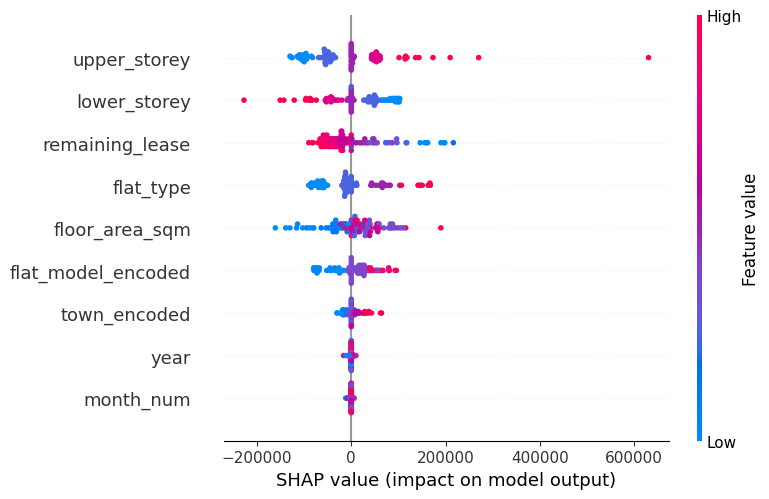

In [27]:
shap.summary_plot(shap_values, X_test_subset)

Here, the features are ranked in descending order of importance based on their average absolute SHAP values. The further a dot is from 0, the larger the impact of that feature on the model's prediction for a particular data point. As seen in the plot, upper_storey, lower_storey are the most impactful features in the model, and remaining_lase, flat_type and floor_area_sqm are also significant contributors.

For upper_storey and lower_storey, high values (red dots for upper_storey) have a strong positive impact, which indicates that higher floors are associated with higher resale prices. Conversely, low values (blue dots for lower_storey) push the price lower.

Higher remaining lease values (red dots) strongly increase resale prices, as buyers are likely to pay a premium for longer lease terms. Conversely, low values (blue dots) decrease prices significantly.

For flat_type, it appears to have mixed impacts across its range, as red and blue dots are distributed on both sides of the SHAP value axis. However, we do see some red dots that are further off from the center. Those are probably more expensive flat_type such as Multi-Generation and Executive type pushing the price up significantly.

Lastly, we see that for floor_area_sqm, higher values (red dots) increase resale prices significantly, indicating larger flats command higher prices. Conversely, lower values (blue dots) have a negative impact as the prices are lowered.

So, from our SHAP visualisation, we see that the features we talked about above dominates the temporal features such as year and month_num. This suggests that while housing prices may exhibit some temporal trends, other factors are still much more impactful.

## 1.4 Future Improvements

### 1.4.1 Hyperparameter Tuning 

Due to having limited computational power, it is not feasible for us to perform hyperparameter tuning as it would take too much time and power. Thus, we will discuss about how we can go about performing it.

To further improve our MLPRegressor for predicting resale flat prices in Singapore, you can leverage hyperparameter tuning in scikit-learn. Here's a structured plan for incorporating hyperparameter tuning into our future work:

1. Defining the Search Space
For architecture hyperparameters, we can experiment with different number of layers and neurons per layer. For example, we can try hidden layer sizes (128, 64), (128, 64, 32), etc. Having more neurons may capture complex relationships better, but it could also increase the risk of overfitting.

2. Optimisation Hyperparameters
We can also experiement with different arguments for the parameters 'solver', 'learning_rate' and 'learning_rate_init'. For 'solver', we can test between adam, lbfgs and sgd. For learning_rate, we can test fixed rates (i.e constant) vs adaptive strategies (i.e adaptive). Finally for learning_rate_init, we can tune the initial learning rate (eg. 0.0001, 0.001, 0.01) to balance between bias and variance, as well as convergence speed and stability.

3. Regularization Hyperparameters
We can also experiment with the regularisation hyperparameter 'alpha'. It refers to the strength of the L2 regularisation term. This term is divided by the sample size when added to the loss. Some values we can try out are 0.0001, 0.001 or 0.01.

4. Batch Size
We can test different batch sizes to find the optimal trade-off between computational efficiency and gradient stability. Values that we can try are 32, 64, 128, 512.

5. Selecting a Hyperparameter Tuning Method
There are several methods that scikit-learn provides for hyperparameter tuning. We can choose a method based on our computational budget and size of search space. There is Grid Search, RandomizedSearch and Bayesian Optimisation (HyperOpt).

6. Early Stopping
We can also fine-tune the parameters for early stopping by adjusting the validation_fraction (eg. from 0.1 to 0.2) to reserve sufficient data for validation. On top of that, we can use n_iter_no_change to avoid premature stopping while ensuring computational efficiency.

### 1.4.2 Geospatial Features 

We have seen from our evalaution of the improved model in Section 1.3.2 that a possible problem could be that the data is missing features that can help the model better explain the variance for high-priced flats. With this, we propose that for future work, we can collect more data on the geospatial features to enhance the predictive power of the model. Below are some of the features we would consider:

1. Proximity to MRT Stations
We can compute the distance of each flat to the nearest MRT station, and encode this feature as a continuous variable or categorise into ranges (eg. less than 500m, 500m-1km, etc.).

2. Proximity to Schools, Parks or Malls
We think that distances to popular amenities such as schools and malls can have a significant effect on the flat desirability and thus the price.

3. Regional Features
We can consider grouping the towns into braoder regions (eg. Central, North, East) and encode these as categorical features. Different regions in Singapore have varying demand and property price levels due to factors such as accessibility and amenities. So, we can use this to help simplify the model's understanding of location effects while capturing regional price patterns. For instance, flat in the Central region could have higher resale values than those in suburban areas like Choa Chu Kang.

4. Visualizing Geospatial Impact
We can also consider using geospatial plots such as chloropleth maps to visualise the influence of location on flat prices. We can use this to highlights regional differences in model predictions.

5. External Datasets
Our one dataset with its current features might not be sufficient for the model to understand the rationale behind certain prices. So, integrating external data sources such as public transport accessibility index, urban density metrics and real estate transaction trends can provide more insights for the model to better predict the flat prices. For instance, real estate prices are not static, and are shaped by economic factors, buyer sentiment and government policies. So, by incorporating this, it allows the model to account for the dynamic nature of the housing market, and make predictions that are more responsive to recent changes.